### Load

https://github.com/fivethirtyeight/guns-data/blob/master/full_data.csv

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [3]:
gundata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gundata/gundata.csv')

In [4]:
gundata.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
gundata.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


### Does age play a role in occurrence of suicides?

In [6]:
gundata['age'] = pd.to_numeric(gundata['age'])

In [7]:
gundata.dropna(inplace=True)

In [8]:
sdata = gundata[gundata['intent'].str.contains(re.compile('(S|s)uicide'))]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


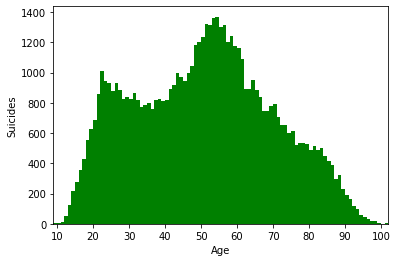

In [9]:
from math import ceil

smin = sdata['age'].min()
smax = sdata['age'].max()
srange = ceil(smax - smin)
y, x, n = plt.hist(sdata['age'], srange, facecolor='g')
plt.ylabel('Suicides')
plt.xlabel('Age')
plt.xlim(smin,smax,1)
plt.xticks(np.arange(smin+1,smax,10), rotation=0)
plt.show()

### Is one gender more prone to suicide than the other one?

In [10]:
sm = sdata[sdata['sex'].str.contains(re.compile('(M|m)'))]
sf = sdata[sdata['sex'].str.contains(re.compile('(F|f)'))]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


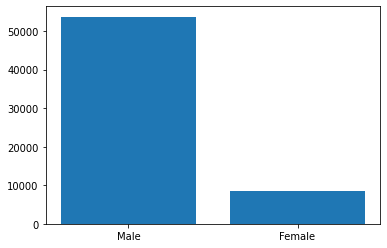

In [11]:
height = [len(sm), len(sf)]
bars = ('Male', 'Female')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.show()

### Is any combination of factors indicative of more suicides than other?


#### Age x Suicide by Sex

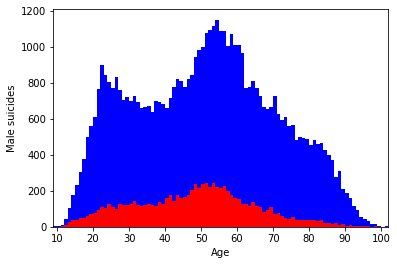

In [12]:
smmin = sm['age'].min()
smmax = sm['age'].max()
smrange = ceil(smmax - smmin)
sfmin = sf['age'].min()
sfmax = sf['age'].max()
sfrange = ceil(sfmax - sfmin)
ym, xm, nm = plt.hist(sm['age'], smrange, facecolor='b')
yf, xf, nf = plt.hist(sf['age'], sfrange, facecolor='r')
plt.ylabel('Male suicides')
plt.xlabel('Age')
plt.xlim(min(smmin, sfmin), max(smmax, sfmax), 1)
plt.xticks(np.arange(min(smmin, sfmin)+1, max(smmax, sfmax), 10), rotation=0)
plt.show()

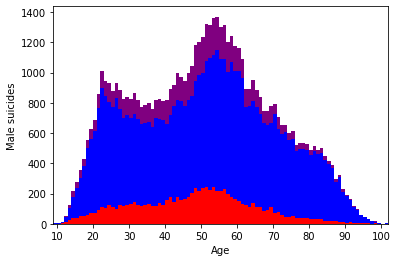

In [14]:
smin = sdata['age'].min()
smax = sdata['age'].max()
srange = ceil(smax - smin)
y, x, n = plt.hist(sdata['age'], srange, facecolor='purple')
smmin = sm['age'].min()
smmax = sm['age'].max()
smrange = ceil(smmax - smmin)
ym, xm, nm = plt.hist(sm['age'], smrange, facecolor='b')
sfmin = sf['age'].min()
sfmax = sf['age'].max()
sfrange = ceil(sfmax - sfmin)
yf, xf, nf = plt.hist(sf['age'], sfrange, facecolor='r')
plt.ylabel('Male suicides')
plt.xlabel('Age')
plt.xlim(min(smmin, sfmin), max(smmax, sfmax), 1)
plt.xticks(np.arange(min(smmin, sfmin)+1, max(smmax, sfmax), 10), rotation=0)
plt.show()

#### Other combinations